In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [17]:
def plot_volt_trace(pars, v, sp):
    """
    Plot trajetory of membrane potential for a single neuron

    Expects:
    pars   : parameter dictionary
    v      : volt trajetory
    sp     : spike train

    Returns:
    figure of the membrane potential trajetory for a single neuron
    """

    V_th = pars['V_th']
    dt, range_t = pars['dt'], pars['range_t']
    if sp.size:
        sp_num = (sp / dt).astype(int) - 1
        v[sp_num] += 20  # draw nicer spikes

    plt.plot(pars['range_t'], v)
    plt.axhline(V_th, 0, 1, color='k', ls='--')
    plt.xlabel('Time (ms)')
    plt.ylabel('V (mV)')
    plt.legend(['Membrane\npotential', r'Threshold V$_{\mathrm{th}}$'],
               loc=[1.05, 0.75])
    plt.ylim([-80, -40])


In [26]:
def default_pars(**kwargs):
    pars = {}

    pars['V_th'] = -55.     # spike threshold [mV]
    pars['V_reset'] = -75.  # reset potential [mV]
    pars['tau_m'] = 10.     # membrane time constant [ms]
    pars['g_L'] = 10.       # leak conductance [nS]
    pars['V_init'] = -75.   # initial potential [mV]
    pars['E_L'] = -75.      # leak reversal potential [mV]
    pars['tref'] = 2.       # refractory time (ms)

    # simulation parameters
    pars['T'] = 400.  # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    # external parameters if any
    for k in kwargs:
        pars[k] = kwargs[k]

    # Vector of discretized time points [ms]
    pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

    return pars


In [27]:
def simulate_LIF(pars: list, I_inj: float):
    """Simulate LIF dynamics with an external input current.

    Args:
        pars (list): dictionary of neuron and synapse parameters
        I_inj (float): Input current.

    Returns:
        rec_v: membrane potential
        rec_sp: spike times
    """

    # Set parameters
    Lt = pars['range_t'].size  # time steps

    # Initialize voltage
    v = np.zeros(Lt)
    v[0] = pars['V_init']

    # Set current time course
    I_inj = I_inj * np.ones(Lt)

    # Loop over time
    rec_spikes = []
    tref = 0.  # refractory counter

    for it in range(Lt - 1):
        if tref > 0:  # in refractory period
            v[it] = pars['V_reset']
            tref -= 1
        elif v[it] >= pars['V_th']:  # over threshold
            rec_spikes.append(it)
            v[it] = pars['V_reset']
            tref = pars['tref'] / pars['dt']

        # Increment in voltage
        dv = (-(v[it] - pars['E_L']) + I_inj[it] /
              pars['g_L']) * (pars['dt'] / pars['tau_m'])

        # Update Vm
        v[it + 1] = v[it] + dv

    rec_spikes = np.array(rec_spikes) * pars['dt']

    return v, rec_spikes


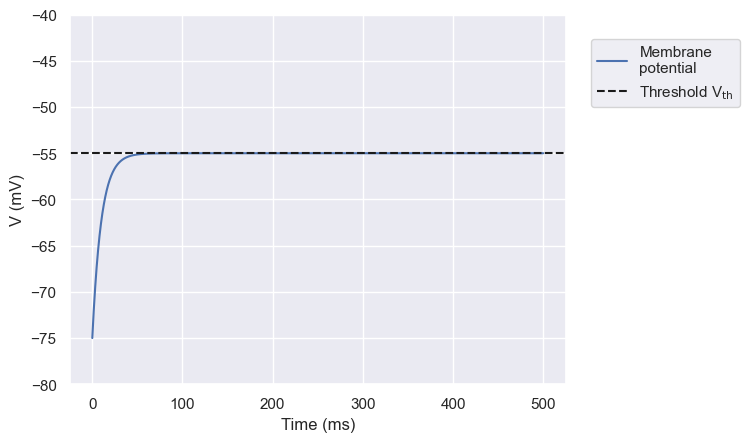

In [42]:
# Get parameters
pars = default_pars(T=500)

# Simulate LIF model
v, sp = simulate_LIF(pars, I_inj=600)

# Plot neuron
plot_volt_trace(pars, v, sp)
